<a href="https://colab.research.google.com/github/HENILCHOPRA/pytorch-learning/blob/main/pytorch_102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***<h1> Image Classification</h1>***

In [ ]:
import torch
import torchvision
from torchvision.transforms import transforms
from torchvision.datasets import MNIST
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_dataset = MNIST(root = '/content/', download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
len(train_dataset)

60000

In [ ]:
test_dataset = MNIST(root = '/content/', train = False)

5


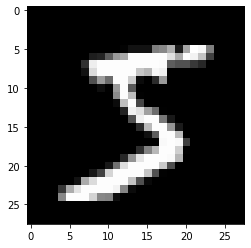

In [ ]:
img, label = train_dataset[0]
plt.imshow(img, cmap = 'gray')
print(label)

*transformation*

In [ ]:
train_data = MNIST(root = '/content/',
                   train = True,
                   transform = transforms.ToTensor())

In [ ]:
test_data = MNIST(root = '/content/',
                   train = False,
                   transform = transforms.ToTensor())

In [ ]:
img_tensor, label = train_data[0]

In [ ]:
type(img_tensor)

torch.Tensor

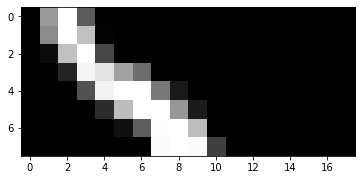

In [ ]:
plt.imshow(img_tensor[0, 10:18,10:28], cmap = 'gray')

In [ ]:
import numpy as np
def split_indices(n,val_pct):
  n_val = int(n * val_pct)
  idxs = np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]

In [ ]:
train_indices, val_indices = split_indices(len(train_dataset), val_pct = 0.2)

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(train_data, batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(train_data, batch_size, sampler = val_sampler)


In [ ]:
import  torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [ ]:
for images, labels in train_loader:
  print(labels)
  print(images)
  output = model(images)
  break

In [ ]:
class mnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out
model = mnistModel()

In [ ]:
model.linear.bias 
model.linear.weight

Parameter containing:
tensor([[-0.0031,  0.0234, -0.0037,  ..., -0.0351,  0.0217,  0.0205],
        [ 0.0307, -0.0088, -0.0133,  ..., -0.0197,  0.0103,  0.0095],
        [ 0.0342,  0.0090,  0.0323,  ..., -0.0141, -0.0180, -0.0250],
        ...,
        [ 0.0152,  0.0152,  0.0065,  ...,  0.0212, -0.0206,  0.0078],
        [ 0.0236, -0.0351, -0.0179,  ...,  0.0264, -0.0197, -0.0113],
        [ 0.0327, -0.0352,  0.0143,  ..., -0.0332,  0.0152,  0.0338]],
       requires_grad=True)

In [ ]:
for images, labels in train_loader:
  outputs = model(images)
  break
print(outputs.shape)
outputs[:2].data 

torch.Size([100, 10])


tensor([[ 0.0408,  0.3293,  0.0510,  0.0703, -0.0215,  0.0168, -0.0418,  0.2313,
          0.2350, -0.1168],
        [ 0.0723, -0.0294,  0.1402, -0.2665,  0.3851,  0.0611, -0.2986,  0.1312,
          0.0209, -0.0717]])

In [ ]:
import torch.nn.functional as F

In [ ]:
probs = F.softmax(outputs, dim = 1) 
# converts outputs to probablities
print(probs[0])

tensor([0.0953, 0.1272, 0.0963, 0.0982, 0.0896, 0.0931, 0.0878, 0.1153, 0.1158,
        0.0814], grad_fn=<SelectBackward0>)


In [ ]:
max_probs, preds = torch.max(probs, dim = 1)
# get maximum probablity and its index from every prediction output
preds

tensor([1, 4, 2, 8, 2, 8, 2, 2, 2, 3, 2, 2, 8, 7, 5, 2, 2, 8, 5, 8, 1, 2, 1, 4,
        4, 4, 8, 8, 4, 2, 4, 2, 2, 8, 8, 2, 8, 4, 2, 0, 5, 4, 3, 4, 2, 2, 8, 7,
        5, 8, 2, 4, 8, 4, 8, 2, 4, 2, 2, 2, 4, 8, 4, 8, 4, 0, 7, 4, 4, 0, 4, 8,
        8, 7, 3, 2, 8, 5, 0, 8, 2, 4, 2, 5, 2, 0, 3, 7, 2, 8, 8, 8, 8, 8, 2, 5,
        5, 4, 4, 2])

In [ ]:
labels
#ground Truth

tensor([4, 1, 3, 3, 1, 7, 2, 0, 5, 1, 1, 1, 5, 0, 6, 8, 6, 9, 5, 3, 6, 8, 4, 1,
        3, 9, 9, 8, 7, 9, 1, 1, 5, 7, 3, 5, 3, 4, 2, 3, 8, 9, 1, 5, 8, 3, 0, 6,
        2, 7, 0, 4, 7, 7, 8, 1, 3, 7, 0, 5, 4, 8, 9, 7, 4, 5, 1, 4, 3, 6, 9, 8,
        8, 0, 1, 5, 7, 2, 1, 7, 1, 8, 0, 2, 2, 5, 5, 6, 0, 7, 9, 8, 2, 9, 0, 7,
        3, 4, 7, 5])

*Evaluation metric*

In [ ]:
def acc(l1, l2):
  return torch.sum(l1 == l2).item() / l1.numel()

In [ ]:
acc(preds, labels)

0.16

In [ ]:
lr = 0.001
opt = torch.optim.ASGD(model.parameters(), lr = lr)
loss_fn = F.cross_entropy
#Does softmax internally so can directly give output of last layer

loss_fn(outputs, labels)

tensor(2.3081, grad_fn=<NllLossBackward0>)

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):
  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [ ]:
def evaluate(model, loss_fn, valid_dl, metric = None):
  with torch.no_grad():
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb,yb in valid_dl]

    losses, nums, metirc_result = zip(*results)

    total = np.sum(nums)

    avg_loss = np.sum(np.multiply(losses, nums)) / total

    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(metirc_result, nums)) / total

    return avg_loss, total, avg_metric

In [ ]:
def acc(l1, l2):
  _, preds = torch.max(l1, dim = 1)
  return torch.sum(preds == l2).item() / preds.numel()

In [ ]:
evaluate(model, loss_fn, val_loader, metric = acc)

(2.329698973894119, 12000, 0.11066666666666666)

In [ ]:
def fit(epochs, model, loss_fn, opt, train_dl, val_dl, metric = None):

  for epoch in range(epochs):
    for xb, yb, in train_dl:
      loss,_ ,_ = loss_batch(model, loss_fn, xb,yb, opt)

    val_loss, total, metric_result  = evaluate(model, loss_fn, val_dl, metric)

    if metric is not None:
      print(epoch, ' : ', val_loss, metric_result)


In [ ]:
model = mnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [ ]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, acc)

0  :  2.2831616342067718 0.10225
1  :  2.2319568753242494 0.16933333333333334
2  :  2.1833391229311627 0.278
3  :  2.136960345506668 0.37525
4  :  2.0925724764664966 0.451


In [ ]:
torch.save(model.state_dict(), '/content/mnist.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0279, -0.0170,  0.0096,  ..., -0.0024, -0.0098,  0.0245],
                      [ 0.0007, -0.0128, -0.0210,  ..., -0.0041,  0.0012, -0.0333],
                      [-0.0185,  0.0005, -0.0069,  ..., -0.0256,  0.0045,  0.0176],
                      ...,
                      [-0.0219, -0.0073,  0.0260,  ..., -0.0303,  0.0031, -0.0205],
                      [-0.0151,  0.0014, -0.0067,  ...,  0.0159, -0.0057, -0.0022],
                      [-0.0077,  0.0165,  0.0106,  ..., -0.0177,  0.0346, -0.0207]])),
             ('linear.bias',
              tensor([-0.0271, -0.0307, -0.0054,  0.0131, -0.0005, -0.0250,  0.0257,  0.0238,
                       0.0212,  0.0181]))])

In [ ]:
model2 = mnistModel()
model2.load_state_dict(torch.load('/content/mnist.pth'))


<All keys matched successfully>

In [ ]:
evaluate(model2, loss_fn, val_loader, metric= acc)

(2.0925724665323893, 12000, 0.451)